In [1]:
import warnings
warnings.filterwarnings('ignore')
import wradlib as wrl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.colors import from_levels_and_colors
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.cm as cm
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
import datetime as dt
from osgeo import osr
import numpy as np
import glob

/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationW

In [2]:
def get_radar_locations():

    radars = {}
    radar = {}
    radar['name'] = 'ASR Dresden'
    radar['wmo'] = 10487
    radar['lon'] = 13.76347
    radar['lat'] = 51.12404
    radar['alt'] = 261
    radars['ASD'] = radar
    
    radar = {}
    #### Kordinaten un hoehe checken! Neu
    # Hoehe üNN 2m
    # Turm 55 m
    radar['name'] = 'Borkum'
    radar['wmo'] = 10103
    radar['lon'] = 6.748292
    radar['lat'] = 53.564011
    radar['alt'] = 57.
    radars['ASB'] = radar

    radar = {}
    radar['name'] = 'Boostedt'
    radar['wmo'] = 10132
    radar['lon'] = 10.04687
    radar['lat'] = 54.00438
    radar['alt'] = 124.56
    radars['BOO'] = radar

    radar = {}
    radar['name'] = 'Dresden'
    radar['wmo'] = 10488
    radar['lon'] = 13.76865
    radar['lat'] = 51.12465
    radar['alt'] = 263.36
    radars['DRS'] = radar

    radar = {}
    radar['name'] = 'Eisberg'
    radar['wmo'] = 10780
    radar['lon'] = 12.40278
    radar['lat'] = 49.54066
    radar['alt'] = 798.79
    radars['EIS'] = radar

    radar = {}
    radar['name'] = 'Emden'
    radar['wmo'] = 10204
    radar['lon'] = 7.02377
    radar['lat'] = 53.33872
    radar['alt'] = 58
    radars['EMD'] = radar

    radar = {}
    radar['name'] = 'Essen'
    radar['wmo'] = 10410
    radar['lon'] = 6.96712
    radar['lat'] = 51.40563
    radar['alt'] = 185.10
    radars['ESS'] = radar

    radar = {}
    radar['name'] = 'Feldberg'
    radar['wmo'] = 10908
    radar['lon'] = 8.00361
    radar['lat'] = 47.87361
    radar['alt'] = 1516.10
    radars['FBG'] = radar

    radar = {}
    radar['name'] = 'Flechtdorf'
    radar['wmo'] = 10440
    radar['lon'] = 8.802
    radar['lat'] = 51.3112
    radar['alt'] = 627.88
    radars['FLD'] = radar

    radar = {}
    radar['name'] = 'Hannover'
    radar['wmo'] = 10339
    radar['lon'] = 9.69452
    radar['lat'] = 52.46008
    radar['alt'] = 97.66
    radars['HNR'] = radar

    radar = {}
    radar['name'] = 'Neuhaus'
    radar['wmo'] = 10557
    radar['lon'] = 11.13504
    radar['lat'] = 50.50012
    radar['alt'] = 878.04
    radars['NEU'] = radar

    radar = {}
    radar['name'] = 'Neuheilenbach'
    radar['wmo'] = 10605
    radar['lon'] = 6.54853
    radar['lat'] = 50.10965
    radar['alt'] = 585.84
    radars['NHB'] = radar

    radar = {}
    radar['name'] = 'Offenthal'
    radar['wmo'] = 10629
    radar['lon'] = 8.71293
    radar['lat'] = 49.9847
    radar['alt'] = 245.80
    radars['OFT'] = radar

    radar = {}
    radar['name'] = 'Proetzel'
    radar['wmo'] = 10392
    radar['lon'] = 13.85821
    radar['lat'] = 52.64867
    radar['alt'] = 193.92
    radars['PRO'] = radar

    radar = {}
    radar['name'] = 'Memmingen'
    radar['wmo'] = 10950
    radar['lon'] = 10.21924
    radar['lat'] = 48.04214
    radar['alt'] = 724.40
    radars['MEM'] = radar

    radar = {}
    radar['name'] = 'Rostock'
    radar['wmo'] = 10169
    radar['lon'] = 12.05808
    radar['lat'] = 54.17566
    radar['alt'] = 37
    radars['ROS'] = radar

    radar = {}
    radar['name'] = 'Isen'
    radar['wmo'] = 10873
    radar['lon'] = 12.10177
    radar['lat'] = 48.1747
    radar['alt'] = 677.77
    radars['ISN'] = radar

    radar = {}
    radar['name'] = 'Tuerkheim'
    radar['wmo'] = 10832
    radar['lon'] = 9.78278
    radar['lat'] = 48.58528
    radar['alt'] = 767.62
    radars['TUR'] = radar

    radar = {}
    radar['name'] = 'Ummendorf'
    radar['wmo'] = 10356
    radar['lon'] = 11.17609
    radar['lat'] = 52.16009
    radar['alt'] = 183
    radars['UMM'] = radar

    
    return radars


In [3]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.readDX(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = r = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==6.748292) & (lat0[rrr]==53.564011) & (alt0[rrr]==57.):
            print ("Elevationen bei Borkum geändert!")
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        grid = wrl.georef.polar.spherical_to_proj(polargrid[0], polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        print np.nanmax(alt)


    return all_lon, all_lat, all_alt, all_scans

In [4]:
#Einlesen aller DX Standorte
#all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)
all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)

('10103', '10103', 6.748292, 53.564011, 'Borkum')
('10132', '10132', 10.04687, 54.00438, 'Boostedt')
('10169', '10169', 12.05808, 54.17566, 'Rostock')
('10339', '10339', 9.69452, 52.46008, 'Hannover')
('10356', '10356', 11.17609, 52.16009, 'Ummendorf')
('10392', '10392', 13.85821, 52.64867, 'Proetzel')
('10410', '10410', 6.96712, 51.40563, 'Essen')
('10440', '10440', 8.802, 51.3112, 'Flechtdorf')
('10488', '10488', 13.76865, 51.12465, 'Dresden')
('10557', '10557', 11.13504, 50.50012, 'Neuhaus')
('10605', '10605', 6.54853, 50.10965, 'Neuheilenbach')
('10629', '10629', 8.71293, 49.9847, 'Offenthal')
('10780', '10780', 12.40278, 49.54066, 'Eisberg')
('10832', '10832', 9.78278, 48.58528, 'Tuerkheim')
('10873', '10873', 12.10177, 48.1747, 'Isen')
('10908', '10908', 8.00361, 47.87361, 'Feldberg')
('10950', '10950', 10.21924, 48.04214, 'Memmingen')
['Borkum', 'Boostedt', 'Rostock', 'Hannover', 'Ummendorf', 'Proetzel', 'Essen', 'Flechtdorf', 'Dresden', 'Neuhaus', 'Neuheilenbach', 'Offenthal', 

In [5]:
"""all_lon.shape, all_scans.shape
r = np.arange(0,128)*1000 
elevation = 0.5
erd_rad = wrl.georef.get_earth_radius(get_radar_locations()['BOO']['lat'])
wrl.georef.bin_distance(r,elevation, get_radar_locations()['BOO']['alt'],erd_rad)[-1]"""

/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


"all_lon.shape, all_scans.shape\nr = np.arange(0,128)*1000 \nelevation = 0.5\nerd_rad = wrl.georef.get_earth_radius(get_radar_locations()['BOO']['lat'])\nwrl.georef.bin_distance(r,elevation, get_radar_locations()['BOO']['alt'],erd_rad)[-1]"

In [ ]:
"""get_radar_locations()['ASB']"""

"get_radar_locations()['ASB']"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


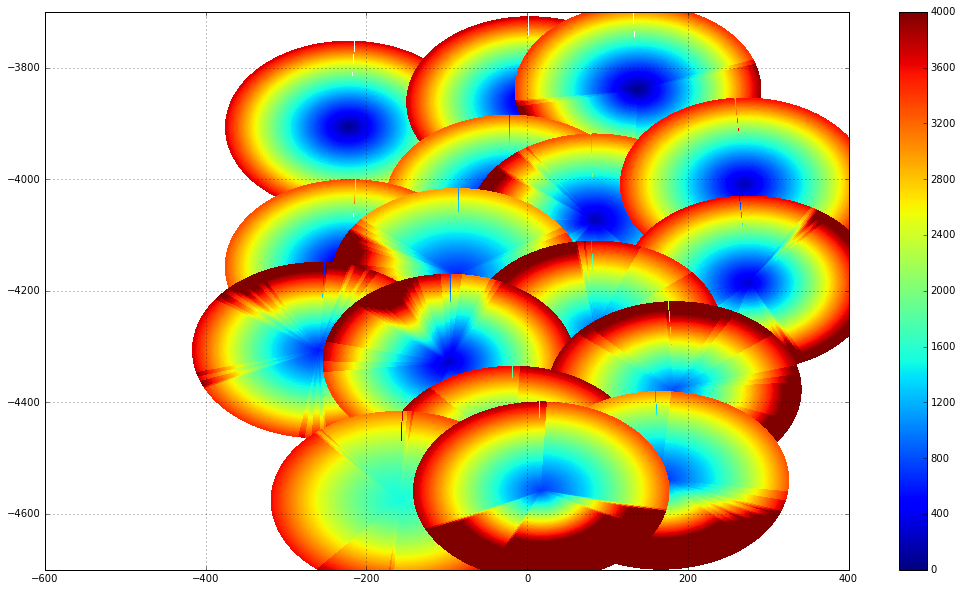

In [ ]:
plt.figure(figsize=(18,10))

for plpl in range(all_lon.shape[0]):
    print plpl
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()

In [ ]:
"""plt.figure(figsize=(18,10))

for plpl in range(all_lon.shape[0]):
    #print (plpl)
    #plt.subplot(17,1,plpl+1)
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_scans[plpl,...], vmin=0, vmax=40)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()"""

In [ ]:
print(wrl.georef.get_radolan_grid().shape)
x = wrl.georef.get_radolan_grid()[:,:,0]
y = wrl.georef.get_radolan_grid()[:,:,1]
print (x.shape, y.shape)

### Interpolate dx on RADOLAN gird
-------------------------------

In [ ]:
"""plpl=13


# Observations and source coordinates DX
src = np.vstack( (all_lon[plpl,...], all_lat[plpl,...])).transpose()
vals = all_alt[plpl,...]



# Target coordinates RADOLAN
trg = np.vstack( (x.ravel(), y.ravel()) ).T

# Interpolation objects
idw = wrl.ipol.Idw(src, trg)"""




In [ ]:
"""from satlib import ipoli_radi
plpl=13
#dx
xy_dx = np.vstack((all_lon[plpl,...].ravel(), all_lat[plpl,...].ravel())).transpose()
#radolan
grid_xy = np.vstack((x.ravel(), y.ravel())).transpose()

h_on_radolan = ipoli_radi(xy_dx, all_alt[plpl,...].ravel(), grid_xy, 1)
h_on_radolan = h_on_radolan.reshape(x.shape)"""

In [ ]:
from satlib import ipoli_radi

#dx
xy_dx = np.vstack((all_lon.ravel(), all_lat.ravel())).transpose()
#radolan
grid_xy = np.vstack((x.ravel(), y.ravel())).transpose()

h_on_radolan = ipoli_radi(xy_dx, all_alt.ravel(), grid_xy, 1.5)
h_on_radolan = h_on_radolan.reshape(x.shape)

In [ ]:
ZP = '201803072145'
import wradlib

pfad = ('/automount/radar/dwd/ry/2018/2018-03/2018-03-07/raa01-ry_10000-1803072140-dwd---bin.gz')

rw_filename = wradlib.util.get_wradlib_data_file(pfad)


rwdata, rwattrs = wradlib.io.read_RADOLAN_composite(rw_filename)


radolan_grid_xy = wradlib.georef.get_radolan_grid(900,900)
x1 = radolan_grid_xy[:,:,0]
y1 = radolan_grid_xy[:,:,1]
rwdata1 = np.ma.masked_equal(rwdata, -9999) / 2 - 32.5



In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,2)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan), vmin=0, vmax=4000)
plt.title('Max Heights of interpolated DX \n Radar Scans on the RADOLAN grid in m')

plt.grid()
plt.colorbar()

plt.subplot(1,3,1)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')

for plpl in range(all_lon.shape[0]):
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.title('Heights of DX Radar Scans in m')
plt.grid()


plt.subplot(1,3,3)
plt.pcolormesh(x1,y1,rwdata1, vmin=0)
plt.title('RADOLAN RY Scan Area')
plt.colorbar()
plt.grid()

plt.tight_layout()
plt.savefig("/automount/ftp/velibor/RY_H_max_testradius1500m.png")


In [ ]:
# Save
#np.save("/automount/ags/velibor/data/radolan_dx/RY_maxHxy.npy",[x,y, h_on_radolan])


In [ ]:
plt.figure(figsize=(14,10))
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan))


In [ ]:
degi= np.arange(0.5,1.9,0.1)
abstand = np.cos(np.deg2rad(degi))*128
print abstand


In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,2)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan), vmin=0, vmax=4000)
plt.title('Mean Heights of interpolated DX \n Radar Scans on the RADOLAN grid in m')

plt.grid()
plt.colorbar()

plt.subplot(1,3,1)
plt.pcolormesh(x1,y1,rwdata1, vmax=0, cmap='spectral')

for plpl in range(all_lon.shape[0]):
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.title('Heights of DX Radar Scans in m')
plt.grid()


plt.subplot(1,3,3)
plt.pcolormesh(x1,y1,rwdata1, vmin=0)
plt.title('RADOLAN RY Scan Area')
plt.colorbar()
plt.grid()

plt.tight_layout()
plt.savefig("/automount/ftp/velibor/RY_H2_max.pdf")


In [ ]:
rhmax = np.load("/automount/ags/velibor/data/radolan_dx/RY_maxHxy.npy")
rhmin = np.load("/automount/ags/velibor/data/radolan_dx/RY_minHxy.npy")

In [ ]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,7000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)




plt.figure(figsize=(16,6))
colmap = 'jet'
plt.subplot(1,3,2)
plt.pcolormesh(rhmax[0],rhmax[1],np.ma.masked_invalid(rhmax[2]), vmin=0, vmax=7000, cmap=cmap, norm=norm)
plt.title('Maxiumum possible measured \n heights in RADOLAN Composit [m]')

plt.grid()
plt.colorbar()

plt.subplot(1,3,1)
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmin[2]), vmin=0, vmax=7000, cmap=cmap, norm=norm )
plt.title('Minimum possible measured \n heights in RADOLAN Composit [m]')

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()

cmap2 = plt.cm.jet
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

plt.subplot(1,3,3)
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0, vmax=4000, cmap=cmap, norm=norm2 )
plt.title('Maximal possible measured \n heights ranges in RADOLAN Composit [m]')
plt.colorbar()
plt.grid()

plt.tight_layout()
plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_testradius1500m.pdf")
plt.show()

In [ ]:
rhmax_1d = rhmax[2].reshape(900*900)
rhmax_1d = rhmin[2].reshape(900*900)

In [ ]:
maske = ~np.isnan(rhmax_1d)
plt.hist(rhmax_1d[maske], bins=100)
plt.xlabel('Maximum DX Hights')
plt.ylabel('#')
plt.grid()
